In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib

from skimage.exposure import rescale_intensity
from skimage.transform import rescale, rotate
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.metrics import mean_squared_error
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import cosine

In [2]:
# read grayscale image with intensity range between 0-1
def read_image(in_path):
    print(in_path)
    img = np.array(Image.open(in_path))

    # convert to floating point image with intensity [0, 1]
    if np.max(img) > 1:
        img = img.astype(np.float32) / 255.0

    # convert to grayscale
    if len(img.shape) > 2:
        img = rgb2gray(img)

    return img

In [3]:
def rescale_image(img):
  # rescale short side to standard size, then crop center
  standard = 256
  scale = standard / min(img.shape[:2])
  img = rescale(img, scale, anti_aliasing=True)
  img = img[int(img.shape[0]/2 - standard/2) : int(img.shape[0]/2 + standard/2),
            int(img.shape[1]/2 - standard/2) : int(img.shape[1]/2 + standard/2)]
  return img

### Non-Blurred

In [4]:
# Load Files
directory = '../../../Images/single class samples/No Blur'

# List to hold file names
impaths = []

# Loop through directory
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        impaths.append(filename)

../../../Images/single class samples/No Blur\Convertible_train_orig_test_03032_resized_no_blur.jpg
../../../Images/single class samples/No Blur\Pickup_train_orig_train_06228_resized_no_blur.jpg
../../../Images/single class samples/No Blur\Sedan_train_orig_test_07439_resized_no_blur.jpg
../../../Images/single class samples/No Blur\SUV_train_orig_train_01435_resized_no_blur.jpg


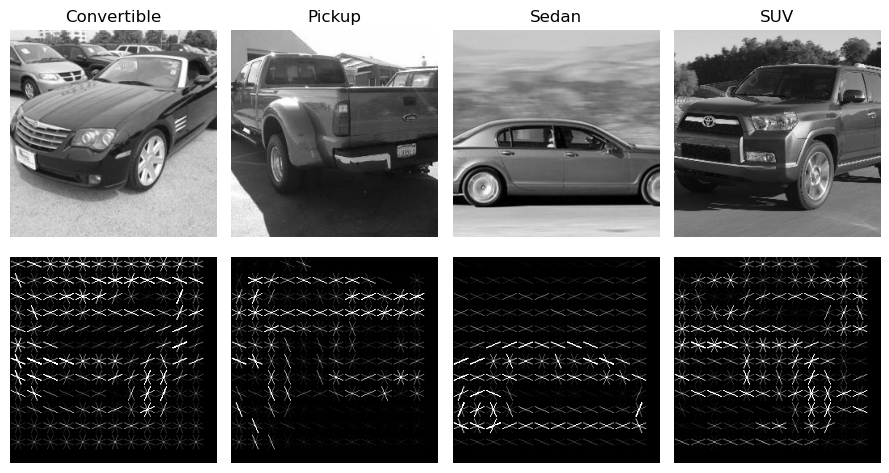

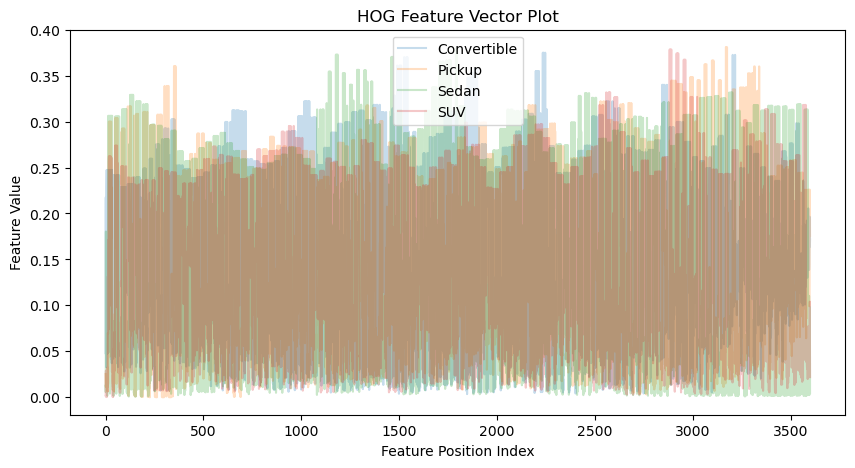

In [5]:

def plot_hog_features(impaths, directory):
    fig, ax = plt.subplots(nrows=2, ncols=len(impaths), figsize=(9,5))
    images = []
    features = []
    
    for i, impath in enumerate(impaths):
      im_processed = rescale_image(read_image(os.path.join(directory, impath)))
      images.append(im_processed)
      f, h = hog(im_processed, orientations=4, pixels_per_cell=(20, 20), visualize=True)
      features.append(f)
      ax[0,i].imshow(im_processed, cmap = 'gray', vmin = 0, vmax = 1)
      ax[0,i].axis('off')
      ax[0,i].set_title(impath.split("_")[0])
      ax[1,i].imshow(10*h, cmap = 'gray', vmin = 0, vmax = 0.5)
      ax[1,i].axis('off')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize = (10, 5))
    for f in features:
      plt.plot(f, alpha = 0.25)
    plt.title("HOG Feature Vector Plot")
    plt.xlabel("Feature Position Index")
    plt.ylabel("Feature Value")
    plt.legend([car.split("_")[0] for car in impaths])
    plt.show()

    return features


features = plot_hog_features(impaths, directory)

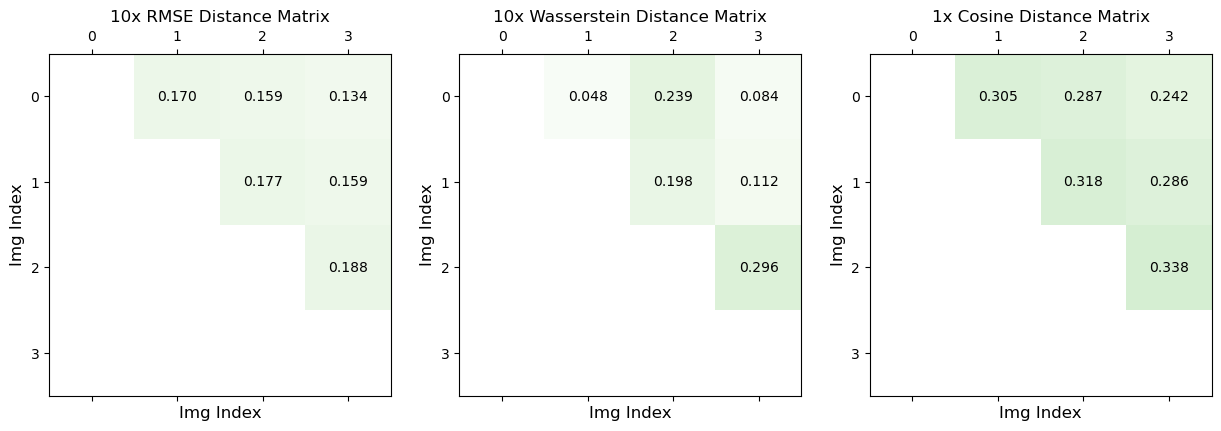

In [6]:
# compute distances
def compute_distances(features):
    N = len(features)
    features = np.array(features)
    dist_rmse = np.nan * np.ones((N, N))
    dist_wass = np.nan * np.ones((N, N))
    dist_cosn = np.nan * np.ones((N, N))
    for i in range(N):
      for j in range(i+1, N):
        dist_rmse[i, j] = mean_squared_error(features[i], features[j])
        dist_wass[i, j] = wasserstein_distance(features[i], features[j])
        dist_cosn[i, j] = cosine(features[i], features[j])
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    for fi, (label, distval) in enumerate(zip(['RMSE', 'Wasserstein', 'Cosine'], [dist_rmse, dist_wass, dist_cosn])):
      if label == 'Cosine': sf=1
      else: sf=10
    
      ax[fi].matshow(sf*distval, cmap=plt.cm.Greens, alpha=0.5, vmin=0, vmax=1)
      for i in range(distval.shape[0]):
          for j in range(distval.shape[1]):
              ax[fi].text(x=j, y=i, s=['{:.3f}'.format(sf*distval[i, j]) if not np.isnan(distval[i,j]) else ''][0], va='center', ha='center', size='medium')
      ax[fi].set_xlabel('Img Index', fontsize=12)
      ax[fi].set_ylabel('Img Index', fontsize=12)
      ax[fi].set_title('{}x {} Distance Matrix'.format(sf,label), fontsize=12)
    
    plt.show()

compute_distances(features)

# Blurred

In [7]:
# Load Files
directory_blurred = '../../../Images/single class samples/Blur'

# List to hold file names
impaths_blurred = []

# Loop through directory
for filename in os.listdir(directory_blurred):
    if os.path.isfile(os.path.join(directory_blurred, filename)):
        impaths_blurred.append(filename)

../../../Images/single class samples/Blur\Convertible_train_orig_test_03032_resized_blurred.jpg
../../../Images/single class samples/Blur\Pickup_train_orig_train_06228_resized_blurred.jpg
../../../Images/single class samples/Blur\Sedan_train_orig_test_07439_resized_blurred.jpg
../../../Images/single class samples/Blur\SUV_train_orig_train_01435_resized_blurred.jpg


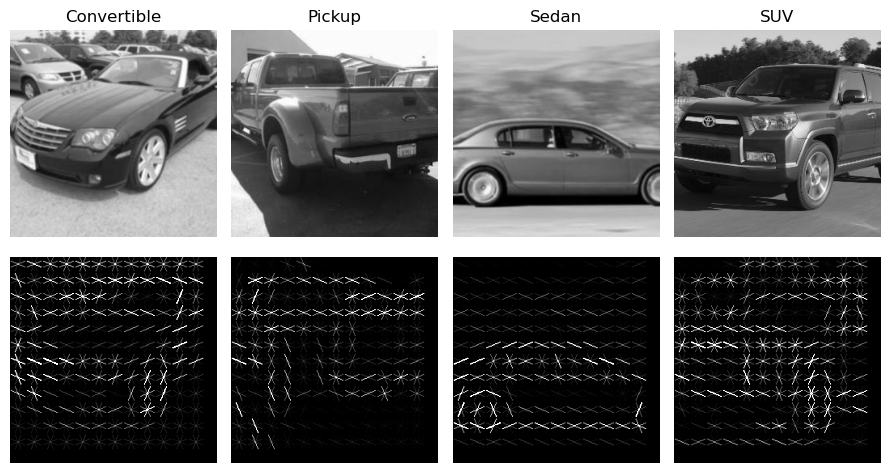

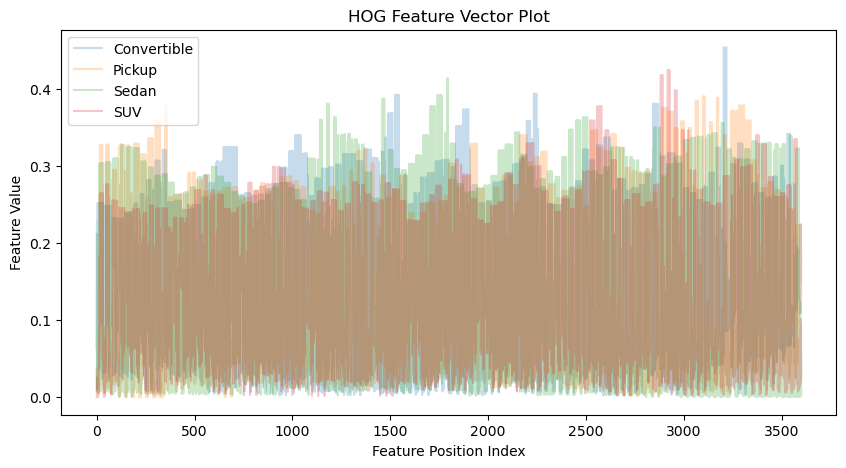

In [8]:
features_blur = plot_hog_features(impaths_blurred, directory_blurred)

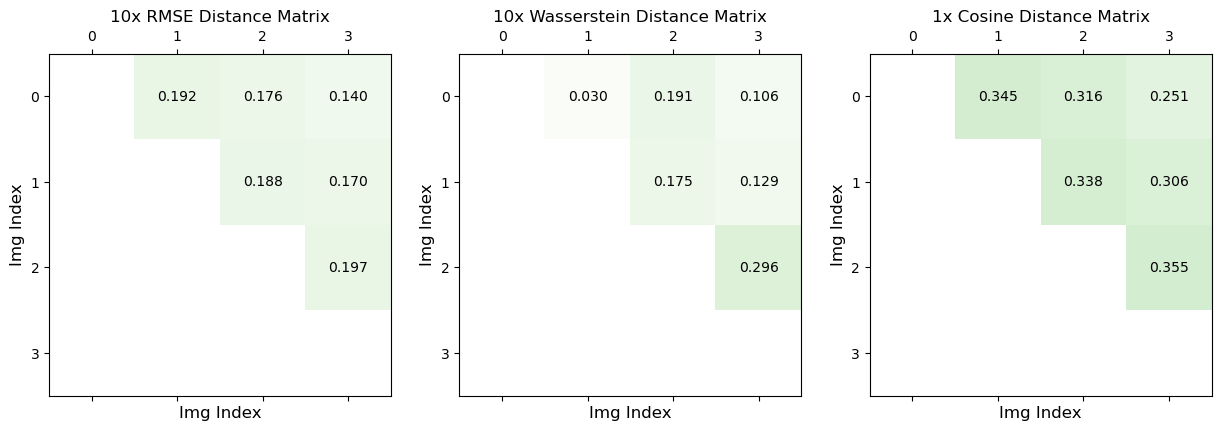

In [9]:
compute_distances(features_blur)